# <font color="blue">Workshop : Hands-on Data PreProcessing using Python</font>

- by Shivam Bansal | Feb 20, 2019 | NUS BAC

<hr>

### Contents 

1. Data Pre-Processing     
2. PreProcessing - Numerical Data  
3. PreProcessing - Text Data  


<br>
<hr> 

### <font color="blue">1. What is Data PreProcessing ?</font> 

#### Life Cycle of a Data Science Project 

A typical data science project lifecycle consists of 7 main steps : 

1. Business Use Case Understanding   
2. Relevant Data Collection   
3. Data PreProcessing   
4. Exploration of Data   
5. New Features Engineering    
6. Modelling  - Descriptive or Predictive    
7. Insights Extraction   

<img src="http://sudeep.co/images/post_images/2018-02-09-Understanding-the-Data-Science-Lifecycle/chart.png" width=400>

<br>

#### Effort and Time Spend 

<img src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fgilpress%2Ffiles%2F2016%2F03%2FTime-1200x511.jpg">

<br><br><br><hr>

### <font color="blue">What is Data Preprocessing ?</font> 

Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors.      

<br>
For Example: 
<br>

<br>
<img src="https://i.imgur.com/qSDfmu5.png" width=600>
<br>

Another Example:   

<br>
<img src="https://i.imgur.com/xZl4Wtt.png" width=500>
<br>

Another Example:   

<br>
<img src="https://powerspreadsheets.com/wp-content/uploads/excel-date-format-dddd-mmmm-dd-yyyy.jpg" width=500>
<br>


<b>Data preprocessing is a systematic process of cleaning a dataset so that a raw dataset is converted into a standardized one.</b>   

**Why DataPreProcessing ?** 
- Quality of your inputs decide the quality of your output   
-- Uncleaned Data can lead to a biased analysis or a biased model  
-- Uncleaned Data can produce to noisy and wrong results  
- Without preprocessing, the problem size increases  
-- model's can become very complex   
-- more training time  
-- high chances of non-convergence  
-- Without preprocessing, dimentionality of data space is very huge, more computation is required   
- Better Interpretability of results and model outputs   
- Can lead to improvement in accuracy  


<br><hr> 

### <font color="blue">2 : PreProcessing Numerical Data</font> 

Dataset : House Price Prediction
Label : House Price  
Features : Attributes of a House  

First load the dataset in a pandas dataframe 

In [56]:
## Write Code Here to load the data in pandas dataframe
import pandas as pd 

data = pd.read_csv("data/house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Ideally, the first step is to understand the data and different variables. It involves: 
- identify the target variable and the independent variables  
- identfiy the continuous and categorical variables  
- identify the datatypes of different variables   

### 2.1 Missing Values Treatment   

1. Identify the columns with missing values  
2. Individually handle the columns  
    -- Drop the columns having large missing values  
    -- Impute the continuous columns by stratified mean / median  
    -- Impute the categorical columns by stratified mode  
    -- Predict the missing values using regression models  

In [57]:
data.shape

(1460, 81)

In [58]:
## 1. identify the columns with missing values 
def get_missing_columns():
    
    missing = data.isna().sum(axis = 0).to_frame().rename(columns = {0:"missing_count"})
    missing = missing.sort_values("missing_count", ascending = False)
    missing = missing[missing["missing_count"] > 0]
    
    
    return missing

get_missing_columns()



,missing_count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [59]:
## 1. Drop Columns 

cols_drop = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]

data = data.drop(cols_drop, axis = 1)

get_missing_columns()

,missing_count
LotFrontage,259
GarageType,81
GarageCond,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
BsmtFinType2,38
BsmtExposure,38
BsmtFinType1,37
BsmtCond,37


In [60]:
## 2. Stratified Replacement
data["LotFrontage"]

lookup = {}
for i,row in data.groupby("Neighborhood").agg({"LotFrontage" : "median"}).reset_index().iterrows():
    key = row["Neighborhood"]
    value = row["LotFrontage"]
    lookup[key] = value  
lookup

import numpy as np 
data["LotFrontage"] = data.apply(lambda x : lookup[x["Neighborhood"]] if pd.isnull(x["LotFrontage"]) else x["LotFrontage"]  , axis = 1)

In [61]:
cols_to_fix = [c for c in data.columns if "Garage" in c]
data[cols_to_fix].isna().sum(axis=0)
data[data["GarageType"].isna()][cols_to_fix]

## Write Code Here

for col in cols_to_fix:
    if data[col].dtype == "object":
        data[col] = data[col].fillna("None")    
    else:
        data[col] = data[col].fillna(0)

get_missing_columns()

,missing_count
BsmtFinType2,38
BsmtExposure,38
BsmtFinType1,37
BsmtQual,37
BsmtCond,37
MasVnrType,8
MasVnrArea,8
Electrical,1


In [62]:
cols_to_fix += [c for c in data.columns if "Bsmt" in c]
cols_to_fix += [c for c in data.columns if "Mas" in c]

for c in cols_to_fix:
    if data[c].dtype == "object":
        data[c] = data[c].fillna("NA")
    else:
        data[c] = data[c].fillna(0.0)

get_missing_columns()

,missing_count
Electrical,1


In [63]:
## Write Code Here

electrical_mode = data["Electrical"].mode()[0]
data["Electrical"] = data["Electrical"].fillna(electrical_mode)

get_missing_columns()

,missing_count


In [64]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 2.2 Outliers Treatment

<Figure size 864x432 with 0 Axes>

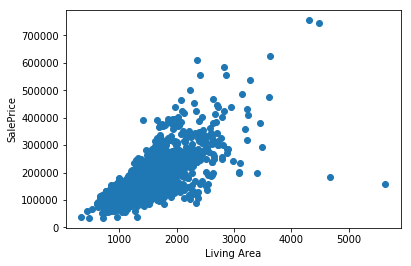

In [65]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.xlabel("Living Area")
plt.ylabel("SalePrice")
plt.show();

## Write Code Here

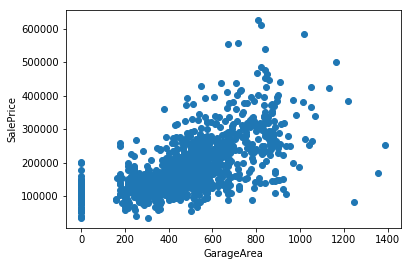

In [69]:
#Deleting outliers
outlier = data[(data["SalePrice"] > 60000) & (data["GrLivArea"] > 4000)]
data = data.drop(outlier.index)


fig, ax = plt.subplots()
ax.scatter(x = data['GarageArea'], y = data['SalePrice'])
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show();

#Check the graphic again
## Write Code Here

In [ ]:
## Write Code Here

### 2.3 Removal of Least Informative Columns

-- Almost Constant Columns (Less Variation)  
-- Duplicate Columns  

In [74]:
## Write Code Here

vardf = data.var().to_frame().rename(columns = {0: "variance"})
vardf.sort_values("variance")

,variance
KitchenAbvGr,4.867641e-02
BsmtHalfBath,5.654195e-02
HalfBath,2.525391e-01
BsmtFullBath,2.677236e-01
FullBath,2.999566e-01
Fireplaces,4.100596e-01
GarageCars,5.568365e-01
BedroomAbvGr,6.655295e-01
OverallCond,1.240919e+00
YrSold,1.767288e+00


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == "object":
        data[col] = le.fit_transform(data[col].values)

## Write Code Here

In [82]:
## Check Variance again 
data.head()

vardf = data.var().to_frame().rename(columns = {0: "variance"})
vardf.sort_values("variance")

## Write Code Here


data["Street"].value_counts()

1    1450
0       6
Name: Street, dtype: int64

In [83]:
## Drop the columns 
print (data.shape)
cols_drop = ["Street", "Utilities"]
data = data.drop(cols_drop, axis = 1)
print (data.shape)
## Write Code Here

(1456, 76)
(1456, 74)


In [84]:
print (data.shape)

data = data.drop_duplicates()

print (data.shape)


(1456, 74)
(1456, 74)


In [85]:
## Duplicate Rows 
print (data.shape)
data["a_duplicate_columns1"] = data["MasVnrArea"]
data["a_duplicate_columns2"] = data["MasVnrArea"]
data["a_duplicate_columns3"] = data["MasVnrArea"]
data["a_duplicate_columns4"] = data["MasVnrArea"]
data["a_duplicate_columns5"] = data["MasVnrArea"]
data["a_duplicate_columns6"] = data["MasVnrArea"]
print (data.shape)

# data.drop_duplicates()

## Write Code Here


(1456, 74)
(1456, 80)


In [88]:
data = data.T.drop_duplicates().T
print (data.shape)

(1456, 74)


In [ ]:
data.head()

In [89]:
## Normalization 

from sklearn.preprocessing import MinMaxScaler

obj = MinMaxScaler()


data[data.columns] = obj.fit_transform(data[data.columns].values)
data.head()
## Write Code Here

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,0.0,0.208333,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8,0.294187
1,0.000685,0.000000,0.75,0.202055,0.038795,1.0,1.0,0.5,0.0,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8,0.248432
2,0.001371,0.235294,0.75,0.160959,0.046507,0.0,1.0,1.0,0.0,0.208333,...,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8,0.319607
3,0.002056,0.294118,0.75,0.133562,0.038561,0.0,1.0,0.0,0.0,0.250000,...,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0,0.178105
4,0.002742,0.235294,0.75,0.215753,0.060576,0.0,1.0,0.5,0.0,0.625000,...,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8,0.364514


Recap  
-- Missing Value Treatment  
-- Outlier Treatment  
-- Redundant Columns Removal  
-- Normalization  


## 3 : Handson PreProcessing of Text Data 

1. Stopwords Removal
2. Special Characters Removal
3. Text Normalization (LowerCasing, Lemmtization, Stemming)
4. Regular Expressions based Removal  - hashtags, urls, mentions  

In [90]:
textdf = pd.read_csv("data/finance_tweets.csv", error_bad_lines = False)
textdf.head()

b'Skipping line 731: expected 8 fields, saw 13\nSkipping line 2836: expected 8 fields, saw 15\nSkipping line 3058: expected 8 fields, saw 12\nSkipping line 3113: expected 8 fields, saw 12\nSkipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 fields, saw 17\nSkipping line 4087: expected 8 fields, saw 17\nSkipping line 4088: expected 8 fields, saw 17\nSkipping line 4499: expected 8 fields, saw 12\n'


,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


In [91]:
import string 
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [92]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [97]:
custom = ["@", "#", "www", "http"]

In [110]:
def clean_my_text(text):
    
    ## lower casing 
    cleaned_text = text.lower()
        
    ## Stopwords Removal
    cleaned_text1 = ""
    words = cleaned_text.split()
    for word in words:
        if word in stopwords:        
            pass
            
        elif any(word.startswith(x) for x in custom):        
            pass
        else:
            cleaned_text1 += word
            cleaned_text1 += " "
    
    ## unnecessary noise removal
#     cleaned_text2 = ""
#     words = cleaned_text1.split()
#     for word in words:
#         if not any(word.startswith(x) for x in custom):        
#             cleaned_text2 += word
#             cleaned_text2 += " "
    
    ## Punctuations Removal
    cleaned_text1 = "".join(x for x in cleaned_text1 if x not in punc)
    
    cleaned_text1 = " ".join(cleaned_text1.split())
    
    ## Remove extra space
    return cleaned_text1
    
clean_my_text("""Today We are learning DATA PrEProcessing !!!. Hey??? We are learning at 
              Business - Analytics Center !!!. #datascience @Prof help us. Sign up @ https://msba.com . 12 23 405 2019 """)

'today learning data preprocessing hey learning business analytics center help us sign 12 23 405 2019'

In [108]:
## Write Code Here

# textdf["cleaned"] = textdf["text"].apply(clean_my_text)

textdf[["text", "cleaned"]]

,text,cleaned
0,VIDEO: “I was in my office. I was minding my o...,video “i office minding business” –david solom...
1,The price of lumber $LB_F is down 22% since hi...,price lumber lbf 22 since hitting ytd highs ma...
2,Who says the American Dream is dead? https://t...,says american dream dead
3,Barry Silbert is extremely optimistic on bitco...,barry silbert extremely optimistic bitcoin pre...
4,How satellites avoid attacks and space junk wh...,satellites avoid attacks space junk circling e...
5,.@RealMoney's David Butler's favorite FANG sto...,realmoneys david butlers favorite fang stock a...
6,Don’t miss my convo with one of my favorite th...,don’t miss convo one favorite thinkers
7,U.S. intelligence documents on Nelson Mandela ...,us intelligence documents nelson mandela made ...
8,Senate wants emergency alerts to go out throug...,senate wants emergency alerts go netflix spoti...
9,Hedge fund manager Marc Larsy says bitcoin $40...,hedge fund manager marc larsy says bitcoin 40k...
